# Unblinding 1eNp

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
pi0scaling = {"val": 0, "suffix": "", "title": "No pi0 Scaling"}

In [3]:
from matplotlib import pyplot as plt

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)

from load_data_run123 import *
from unblinding_far_sideband import *

In [4]:
import sys
import localSettings as ls
main_path = ls.main_path
sys.path.append(main_path)

In [5]:
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [6]:
which_sideband = ['fulldata'     ,'fulldata'] 

In [7]:
samples = load_data_run123(which_sideband=which_sideband[0],
                           return_plotter=False,
                           pi0scaling=pi0scaling["val"],
                           loadpi0variables=False,
                           loadtruthfilters=True,
                           loadshowervariables=True,
                           loadnumuntuples=False,
                           loadnumuvariables=False,
                           loadfakedata=0,
                           USEBDT=True,
                           loadsystematics=True,
                           loadrecoveryvars=True)

Loading uproot files
Loading Run3 dataframes
r3data has shape :  (12875, 178)
Loading Run1 dataframes
r1data has shape :  (8451, 178)
Loading Run2 dataframes
r2data has shape :  (13276, 178)
Concatenate dataframes
opendata dataset has shape :  (34602, 284)
Add derived variables
Add BDT scores


In [28]:
import plotter
import unblinding_far_sideband
import importlib
importlib.reload(plotter)
importlib.reload(unblinding_far_sideband)

<module 'unblinding_far_sideband' from '/Users/davidc-local/Neutrinos/NUE/PELEE/unblinding_far_sideband.py'>

In [29]:
plotter_runbyrun = {}
for run in [1, 2, 3, 123, 12]:
    this_weights, this_pot = get_weights(run,dataset=which_sideband[1])
    plotter_runbyrun[run] = plotter.Plotter(samples, this_weights, pot=this_pot)

In [10]:
DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

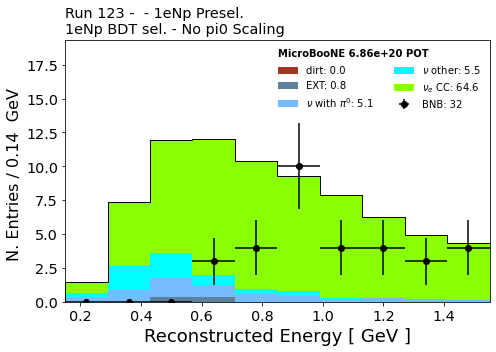

In [11]:
#Test plot: Reco_E >0.65 GeV

from unblinding_far_sideband import *

sdb_key = 'None' 
pre_key = 'NP'
sel_key = 'NPBDT'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'

QUERY += ' and (bnbdata==0 or reco_e>0.65)'

TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.15, 1.55),r"Reconstructed Energy [ GeV ]"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show()
save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+"_1.pdf") 

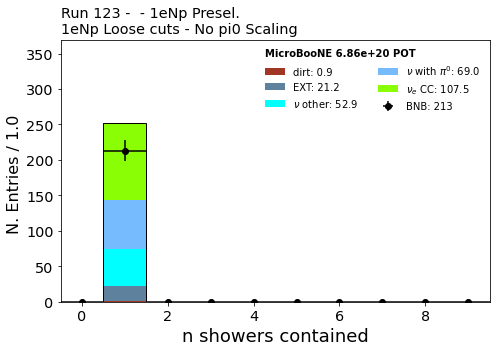

In [12]:
#Test plot: n_showers_contained, all energies, loose selection

from unblinding_far_sideband import *

sdb_key = 'None' 
pre_key = 'NP'
sel_key = 'NPL'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
        
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',10,(-0.5, 9.5),"n showers contained"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show()
save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+"_2.pdf") 

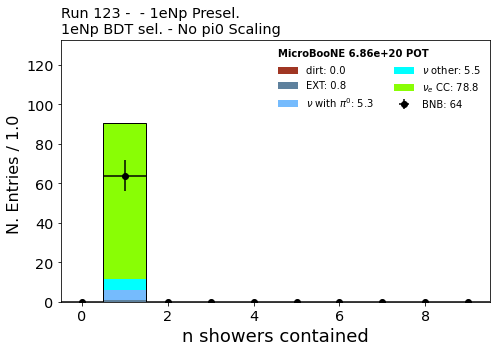

In [13]:
#Test plot: n_showers_contained, all energies, BDT selection

from unblinding_far_sideband import *

sdb_key = 'None' 
pre_key = 'NP'
sel_key = 'NPBDT'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]

DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
        
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

VARIABLE, BINS, RANGE, XTIT = 'n_showers_contained',10,(-0.5, 9.5),"n showers contained"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show()
save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+"_3.pdf") 

# 1eNp Selection

In [14]:
from unblinding_far_sideband import *

sdb_key = 'None'
pre_key = 'NP'
sel_key = 'NPBDT'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]
DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])


QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
        
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text

Reconstructed Neutrino Energy

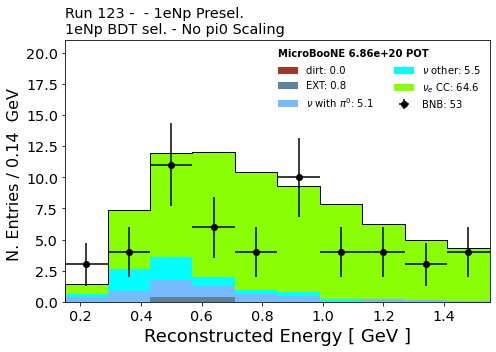

In [15]:
VARIABLE, BINS, RANGE, XTIT = 'reco_e',10,(0.15, 1.55),r"Reconstructed Energy [ GeV ]"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show() 

save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+".pdf") 

Shower Angle

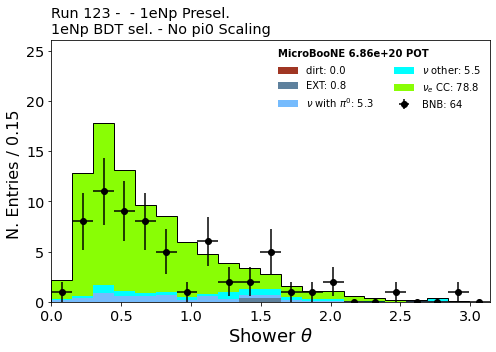

In [16]:
VARIABLE, BINS, RANGE, XTIT = 'shr_theta',21,(0,3.14),r"Shower $\theta$" 

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show() 

save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+".pdf") 

Shower Energy

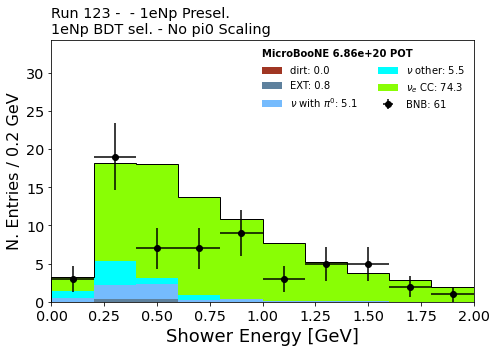

In [17]:
VARIABLE, BINS, RANGE, XTIT = 'electron_e',10,(0,2),"Shower Energy [GeV]"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show() 

save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+".pdf") 

Leading Track Angle

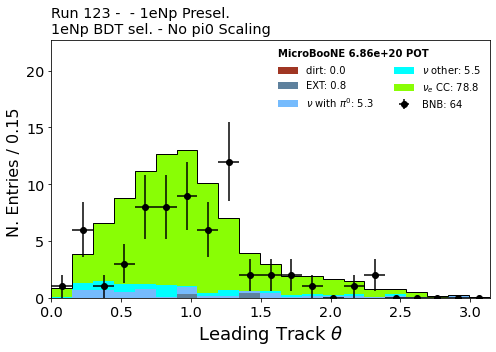

In [18]:
VARIABLE, BINS, RANGE, XTIT = 'trk_theta',21,(0,3.14),r"Leading Track $\theta$"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show() 

save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+".pdf") 

Leading Track Energy

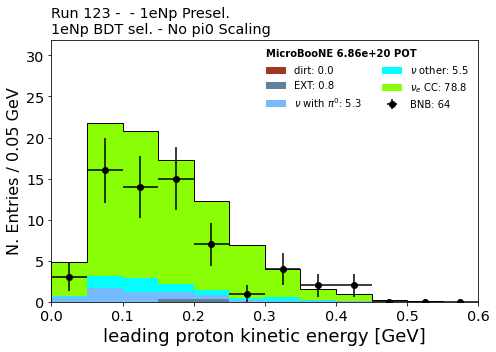

In [19]:
VARIABLE, BINS, RANGE, XTIT = 'protonenergy',12,(0,0.6),"leading proton kinetic energy [GeV]"

fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]

ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.4)

plt.tight_layout()
fig.show() 

save_path = ls.plots_path
fig.savefig(ls.plots_path+VARIABLE+".pdf") 

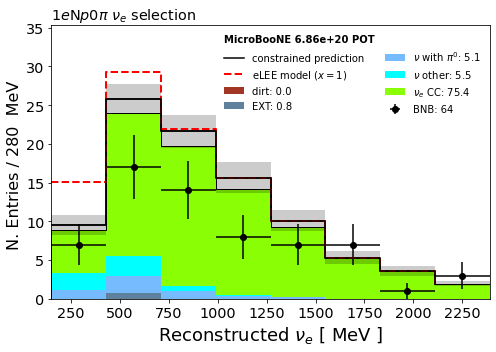

In [32]:
run = 123

sdb_key = 'None'
pre_key = 'NP'
sel_key = 'NPBDT'
run = 123

sideband = sideband_categories[sdb_key]
preselection = preselection_categories[pre_key]
sel =  selection_categories[sel_key]
DETSYSPATH = ls.ntuple_path+'/detsys/{}_{}_{}/'.format(sideband['dir'], preselection['dir'], sel['dir'])

DETSYS = {'mc':False,'nue':False,'ccpi0':False,'ncpi0':False,'dirt':False,\
          'ncnopi':False,'nccpi':False,'ncpi0':False,'ccpi0':False}

QUERY = ""
for query in [sideband['query'],preselection['query'],sel['query']]:
    if query is None: continue
    if QUERY: QUERY += ' and '
    QUERY += query
    if run in [1, 2, 3, 12]:
        QUERY += f' and run{run}==True'
    
SELQUERY = '{}_{}_{}_'.format(sideband['dir'], preselection['dir'], sel['dir'])
    
TITLE = ""
for text in [f'Run {run}',' - ',sideband['title'],' - ',preselection['title'],'\n',sel['title'],' - ',pi0scaling["title"]]:
    if text is None: continue
    TITLE += text
    
#BINSIZE = 140
BINSIZE = 280
    

if (BINSIZE == 140):
    # full-bin
    VARIABLE, BINS, RANGE, XTIT = 'reco_e_mev',17,(150, 2530),r"Reconstructed $\nu_e$ [ MeV ]"
else:
    # half-bin
    VARIABLE, BINS, RANGE, XTIT = 'reco_e_mev',8,(150, 2390),r"Reconstructed $\nu_e$ [ MeV ]"
    
fig, ax1, ax2 = plotter_runbyrun[run].plot_variable(
    VARIABLE,   
    query=QUERY,
    kind="paper_category",
    draw_sys=True,
    detsysdict=DETSYS,
    DETSYSPATH=DETSYSPATH,
    COVMATRIX="",
    predictedevents=True,
    figtitle="MicroBooNE",
    drawsystematics=False,
    labeldecimals=0,
    ratio=False,
    stacksort=3,
    title=XTIT,
    bins=BINS,
    range=RANGE,
    chisq=False,
)[0:3]



n_tot =  plotter_runbyrun[run].prediction

exp_err = np.sqrt(np.diagonal(plotter_runbyrun[run].cov))

n_constrained = n_tot

LEE = np.zeros(len(n_constrained))

if (BINSIZE == 140):
    # full bins
    n_constrained[0] = 1.544
    n_constrained[1] = 8.00
    n_constrained[2] = 12.81
    n_constrained[3] = 13.04
    n_constrained[4] = 11.42
    n_constrained[5] = 10.21
    n_constrained[6] = 8.79
    n_constrained[7] = 6.86
    n_constrained[8] = 5.38
    n_constrained[9] = 4.73
    LEE[0] += 1.96
    LEE[1] += 3.63
    LEE[2] += 2.34
    LEE[3] += 1.05
    LEE[4] += 0.27
    LEE[5] += 0.01
    exp_err[0] = 0.59
    exp_err[1] = 1.18
    exp_err[2] = 1.25
    exp_err[3] = 1.36
    exp_err[4] = 1.58
    exp_err[5] = 1.37
    exp_err[6] = 1.43
    exp_err[7] = 1.45
    exp_err[8] = 0.98
    exp_err[9] = 0.92
else:
    # half bins
    n_constrained[0] = 1.544+8.00
    n_constrained[1] = 12.81+13.04
    n_constrained[2] = 11.42+10.21
    n_constrained[3] = 8.79+6.86
    n_constrained[4] = 5.38+4.73
    LEE[0] += 1.96+3.63
    LEE[1] += 2.34+1.05
    LEE[2] += 0.27+0.01
    exp_err[0] = np.sqrt(0.59**2+1.18**2)
    exp_err[1] = np.sqrt(1.25**2+1.36**2)
    exp_err[2] = np.sqrt(1.58**2+1.37**2)
    exp_err[3] = np.sqrt(1.43**2+1.45**2)
    exp_err[4] = np.sqrt(0.98**2+0.92**2)

n_lee = n_constrained + LEE

if (BINSIZE == 140):
    # full bins
    LEE_err = np.sqrt(exp_err**2 + np.array([0.63,0.76,0.28,0.13,0.04,0,0,0,0,0,0,0,0,0,0,0,0])**2 ) 
else:
    # half bins
    LEE_err = np.sqrt(exp_err**2 + np.array([np.sqrt(0.63**2+0.76**2),np.sqrt(0.28**2+0.13**2),\
                                             np.sqrt(0.04**2+0**2),0,0,0,0,0])**2 ) 

bin_size = np.ones(len(exp_err)) *BINSIZE/2.
bincenters = np.linspace(RANGE[0],RANGE[1]-BINSIZE,BINS) + bin_size

ax1.bar(bincenters, exp_err*2,width=[n*2 for n in bin_size],\
        facecolor='k',alpha=0.2,bottom=(n_constrained-exp_err))#,\
       #label=r'constrained prediction')
ax1.step(bincenters-BINSIZE/2.,n_constrained,color='k',lw=1.5,where='post',label=r'constrained prediction')
ax1.step(bincenters-BINSIZE/2.,n_lee,color='red',linestyle='--',lw=2,where='post',label=r'eLEE model ($x = 1$)')
ax1.step(bincenters-BINSIZE/2.,n_constrained,color='k',lw=1.5,where='post')

leg = ax1.legend(frameon=False, ncol=2, title=r'MicroBooNE %g POT' % plotter_runbyrun[run].pot)
leg._legend_box.align = "left"
plt.setp(leg.get_title(), fontweight='bold')

TITLE = r'1$e$N$p$0$\pi$ $\nu_e$ selection'
ax1.set_title(TITLE, loc='left')
ax1.set_ylim(0., ax1.get_ylim()[1]*1.15)

plt.tight_layout()
fig.show() 

save_path = ls.plots_path
fig.savefig('/Users/davidc-local/Neutrinos/NUE/PRD/'+SELQUERY+VARIABLE+'_run%i'%run+"_PRD_halfbins.pdf") 